# Hello Everyone this my first public notebook on Kaggel, I hope it will help you!!
Dataset: https://www.kaggle.com/datasets/smid80/weatherww2/code?datasetId=3759&sortBy=voteCount

## Algorithms
    1) Linear Reg
    2) Lasso Reg                
    3) Decision Tree Reg         
    4) Random Forest Reg              
    5) Bagging Reg                
    6) Neural Network
   
   
# Note: Uncomment the pipeline for first 4 Algorithms

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
import xgboost as xg
import tensorflow as tf
from sklearn.ensemble import BaggingRegressor
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [12]:
df = pd.read_csv('../input/weatherww2/Summary of Weather.csv',low_memory=False)

In [13]:
df

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.isnull().sum()


STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [15]:
df = df.drop(['Precip','Date','STA','WindGustSpd','Snowfall','PoorWeather', 
              'PRCP', 'DR', 'YR','MO','DA','SPD', 'SNF', 'SND', 'FT', 'FB', 
              'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 
              'WTE'], axis = 1)
df = df.drop(df.columns[-1], axis = 1)

In [16]:
df.head()

,MaxTemp,MinTemp,MeanTemp,MAX,MIN
0,25.555556,22.222222,23.888889,78.0,72.0
1,28.888889,21.666667,25.555556,84.0,71.0
2,26.111111,22.222222,24.444444,79.0,72.0
3,26.666667,22.222222,24.444444,80.0,72.0
4,26.666667,21.666667,24.444444,80.0,71.0


In [17]:
df.isnull().sum()


MaxTemp       0
MinTemp       0
MeanTemp      0
MAX         474
MIN         468
dtype: int64

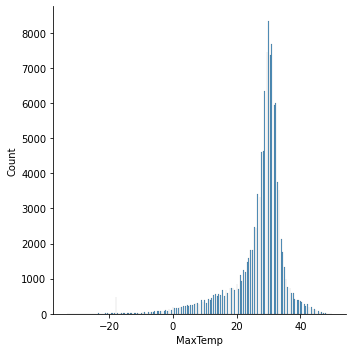

In [18]:
sns.displot(df.MaxTemp)

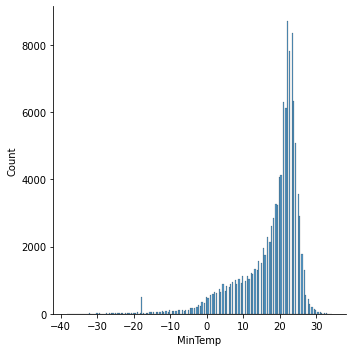

In [19]:
sns.displot(df.MinTemp)

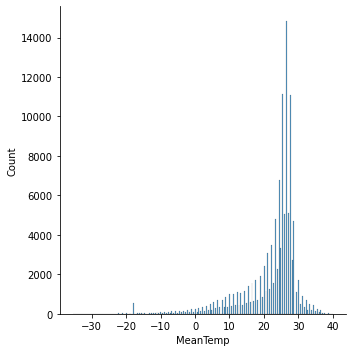

In [20]:
sns.displot(df.MeanTemp)

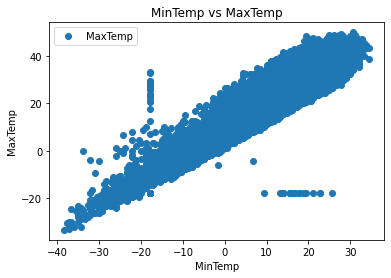

In [21]:
df.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [22]:
# from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [23]:
#comment this cell when using NN
my_pipeline = Pipeline([('std_scaler',StandardScaler())])


In [24]:
X = df['MinTemp'].values.reshape(-1,1)
y = df['MaxTemp'].values.reshape(-1,1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# X_train_piped = my_pipeline.fit_transform(X_train)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model as lm

# model = LinearRegression()
# model = DecisionTreeRegressor(random_state=43)
# model = RandomForestRegressor(random_state=43)
# model = lm.Lasso()
# model = xg.XGBRegressor()
# model = BaggingRegressor()
# model.fit(X_train, y_train)

# Neural Net

In [26]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(f"x train shape{X_train.shape}")
print(f"y train shape{y_train.shape}")
print(f"x test shape{X_test.shape}")
print(f"y test shape{y_test.shape}")
print(f"x val shape{X_val.shape}")
print(f"y val shape{y_val.shape}")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

x train shape(95232, 1)
y train shape(95232, 1)
x test shape(11904, 1)
y test shape(11904, 1)
x val shape(11904, 1)
y val shape(11904, 1)


In [27]:


model = Sequential([

tf.keras.layers.InputLayer(1,),
Dense(64,activation='relu'),
Dense(64,activation='relu'),
# Dense(512,activation='relu'),
# Dense(512,activation='relu'),
Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


2022-10-26 05:14:11.335484: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [28]:

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=opt)

history = model.fit(x=X_train,y=y_train,epochs=3,validation_data=(X_val,y_val))

2022-10-26 05:14:11.517061: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/3
2976/2976 [==============================] - 7s 2ms/step - loss: 246.3334 - val_loss: 25.0911
Epoch 2/3
2976/2976 [==============================] - 6s 2ms/step - loss: 17.2455 - val_loss: 14.2765
Epoch 3/3
2976/2976 [==============================] - 6s 2ms/step - loss: 15.1051 - val_loss: 14.2403


<AxesSubplot:>

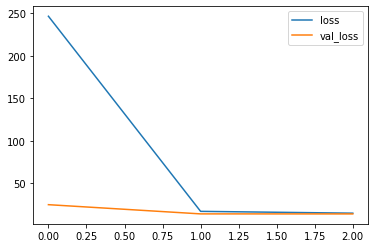

In [29]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [30]:
# X_test_piped = my_pipeline.transform(X_test)
y_pred = model.predict(X_test)
df_ac_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_ac_pred

,Actual,Predicted
0,30.000000,29.765406
1,31.666667,31.366404
2,32.222222,32.731689
3,32.777778,30.565905
4,40.000000,32.224724
...,...,...
11899,42.222222,33.762424
11900,35.000000,32.224724
11901,32.222222,31.099569
11902,22.222222,18.832304


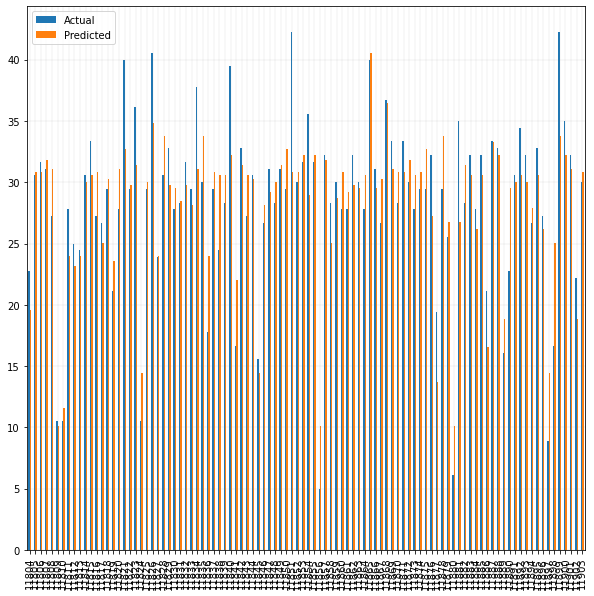

In [31]:
df1 = df_ac_pred.tail(100)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')
plt.show()

# Model Eval


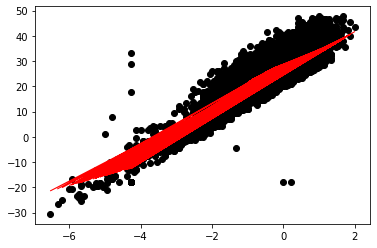

In [32]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.show()

In [33]:
print(f"MAE     :{metrics.mean_absolute_error(y_test, y_pred)}")  
print(f"MSE     :{metrics.mean_squared_error(y_test, y_pred)}")  
print(f"RMSE    :{np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"R2 Score:{r2_score(y_pred,y_test)}")
# print(f"Model Score:{model.score(X_test,y_test)}")

MAE     :2.904609739650376
MSE     :15.41281671575529
RMSE    :3.925916035240093
R2 Score:0.7569458667115638


# Linear Reg:
MAE     :3.182757106660331<br>
MSE     :17.172876145270134<br>
RMSE    :4.14401690938516<br>
R2 Score:0.7037342281447498<br>
Model Score:0.770487023416084

# Lasso
MAE     :3.176158826654466<br>
MSE     :17.182177952481812<br>
RMSE    :4.145139075167661<br>
R2 Score:0.6941091455538198<br>
Model Score:0.7703627061239366<br>

# Decision Tree Reg
MAE     :2.8258342816577673<br>
MSE     :14.54975982144768<br>
RMSE    :3.814414741667151<br>
R2 Score:0.757873884829687<br>
Model Score:0.8055445892142377<br>

# Random Forest
MAE     :2.8260598353472317<br>
MSE     :14.55187810098038<br>
RMSE    :3.814692399261096<br>
R2 Score:0.7577714001228368<br>
Model Score:0.8055162787182745<br>

# XGBoost Reg
MAE     :2.82582701611805<br>
MSE     :14.549649501041168<br>
RMSE    :3.814400280652408<br>
R2 Score:0.757875740594527<br>
Model Score:0.8055460636303262<br>

# Bagging Reg
MAE     :2.8264361456328455<br>
MSE     :14.55302265172954<br>
RMSE    :3.8148424150585223<br>
R2 Score:0.7575939103090761<br>
Model Score:0.8055009819650067<br>

# Neural Net
MAE     :2.894068504938244<br>
MSE     :15.210070574534132<br>
RMSE    :3.9000090480067007<br>
R2 Score:0.7527074594461024<br>